# Introduction
The Titanic's sinking is one of history's most infamous shipwrecks. The Titanic sank in 1912 after colliding with an iceberg, killing 1502 of the 2224 persons on board in addition to the crew.

# Methodology

We'll use a survival analysis statistical method.

In [95]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os


In [96]:
train = pd.read_csv("C:/Users/Cody/Downloads/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
test = pd.read_csv("C:/Users/Cody/Downloads/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [101]:
all = pd.concat([train, test], sort = False)
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [102]:
#Fill Missing numbers with median
all['Age'] = all['Age'].fillna(value=all['Age'].median())
all['Fare'] = all['Fare'].fillna(value=all['Fare'].median())

In [103]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [122]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [123]:
df_train = train.copy()


# Dealing with missing values
We need to deal with missing values of - Age, Embarked and Cabin columns.

For age, we will have to think of some imputing method to fill the values with since deleting the 177 rows will cost us too much information.
We can afford to delete two rows where embarked column has missing values.
We will delete the entire Cabin column since it has no use for us whatsoever.
First, we'll delete the Cabin column

In [124]:

df_train.drop('Cabin',axis=1,inplace=True)

# Imputing method for filling missing age column
We can easily fill the missing age values with the mean of all ages present. But this will not be accurate since the range of age is pretty large (0-80 years).

Instead, we'll use a column in the current dataframe that will help us classify the age range of the person. While this information is not straightforwardly available, if we look carefully at the name column, we can see that it's written in a specific order:

# Surname, Title. Name
What do these titles mean?

Master: A young boy, 
Miss: A young girl, 
Mr: A man, 
Mrs: A married woman, 
and so on...
(Note: There is no exact definition for some of these titles and as of the present time, they are used flexibly)

Thus, we can extract this title information from the name and calculate the individual mean for people with these titles and then assign this mean to the age value. This way, the error will be reduced as compared to assigning the whole dataset mean.

In [126]:
#Using split method of strings, we create a list using ',' as the delimiter and then extract the name followed by another split
#with '.' as the delimiter and strip the whitespaces of the 0th index which is our title

df_train['Title'] = df_train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [127]:
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [128]:
df_train['Age'] = df_train['Age'].fillna(df_train.groupby('Title')['Age'].transform('mean'))

In [129]:
df_train.dropna(subset=['Embarked'],inplace=True)

In [130]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [131]:
df_train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [132]:
#We store the aplha-numeric code in the newly created column Ticket_type. If no code exists we'll assign it a '0'

df_train['Ticket_type'] = df_train['Ticket'].apply(lambda x: x.split()[0] if len(x.split())>1 else '0')

In [86]:
df_train.groupby('Ticket_type').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
Ticket_type,,,,,,,,,,,,
0,663,663,663,663,663,663,663,663,663,663,663,663
A./5.,2,2,2,2,2,2,2,2,2,2,2,2
A.5.,2,2,2,2,2,2,2,2,2,2,2,2
A/4,3,3,3,3,3,3,3,3,3,3,3,3
A/4.,3,3,3,3,3,3,3,3,3,3,3,3
A/5,10,10,10,10,10,10,10,10,10,10,10,10
A/5.,7,7,7,7,7,7,7,7,7,7,7,7
A/S,1,1,1,1,1,1,1,1,1,1,1,1
A4.,1,1,1,1,1,1,1,1,1,1,1,1


From the above groupby table we can see all the ticket types existing in the dataset. Observing the names of the tickets we can see that they represent a location; probably a pair of boarding and destination points but we can't be for sure. Later in the EDA section we'll see what information this column can give us.

Since the number of data for all these codes is not sufficient, it may not be a good idea to consider them in the current form. Instead, we will group the ticket type by using just the initials of the ticket code.

In [133]:
df_train['Ticket_type'] = df_train['Ticket_type'].apply(lambda x: x[0])

In [134]:
df_train.groupby('Ticket_type').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
Ticket_type,,,,,,,,,,,,
0,663,663,663,663,663,663,663,663,663,663,663,663
A,29,29,29,29,29,29,29,29,29,29,29,29
C,47,47,47,47,47,47,47,47,47,47,47,47
F,7,7,7,7,7,7,7,7,7,7,7,7
P,65,65,65,65,65,65,65,65,65,65,65,65
S,65,65,65,65,65,65,65,65,65,65,65,65
W,13,13,13,13,13,13,13,13,13,13,13,13


# Cleaning the rest of the data
We have no use of - PassengerId, Name, Ticket, Title columns anymore since we have already made use of it. So we will delete them now

In [135]:
df_train.drop(['PassengerId','Name','Ticket','Title'],axis=1,inplace=True)

#Resetting the index since we deleted a few rows earlier
df_train.reset_index(drop=True,inplace=True)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_type
0,0,3,male,22.0,1,0,7.2500,S,A
1,1,1,female,38.0,1,0,71.2833,C,P
2,1,3,female,26.0,0,0,7.9250,S,S
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,0


# EDA
We shall now explore the relationships between the features and the survival of the passengers in the titanic using some visualizations.

Let's first see how many people survived based on their gender.

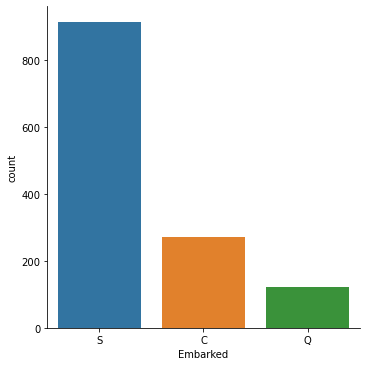

In [14]:
sns.catplot(x = 'Embarked', kind = 'count', data = all) #or all['Embarked'].value_counts()

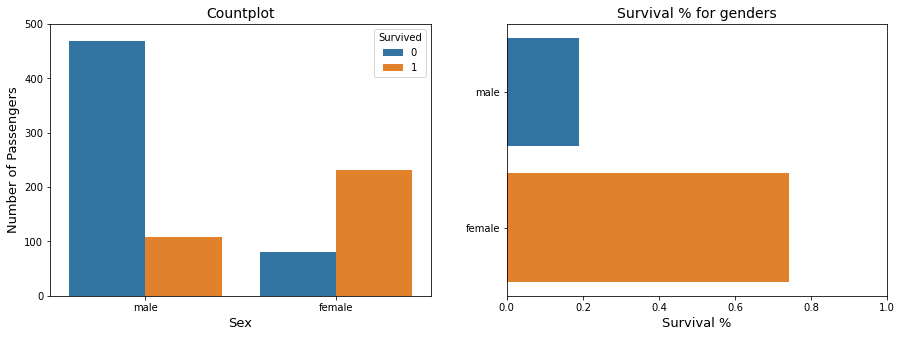

In [137]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='Sex',data=df_train,hue='Survived',ax=ax1)
ax1.set_ylim([0,500])
ax1.set_xlabel('Sex',fontdict={'fontsize':13})
ax1.set_ylabel('Number of Passengers',fontdict={'fontsize':13})
ax1.set_title('Countplot',fontdict={'fontsize':14})

sns.barplot(x='Survived',y='Sex',data=df_train,errwidth=0,ax=ax2)
ax2.set_xlim([0,1])
ax2.set_xlabel('Survival %',fontdict={'fontsize':13})
ax2.set_ylabel('',fontdict={'fontsize':13})
ax2.set_title('Survival % for genders',fontdict={'fontsize':14})

plt.show()

Clearly, more % of females survived than the males did. This is understandable since more priority may have been given to the women and children.

Now let's explore relationships between age, fare and the passenger class.

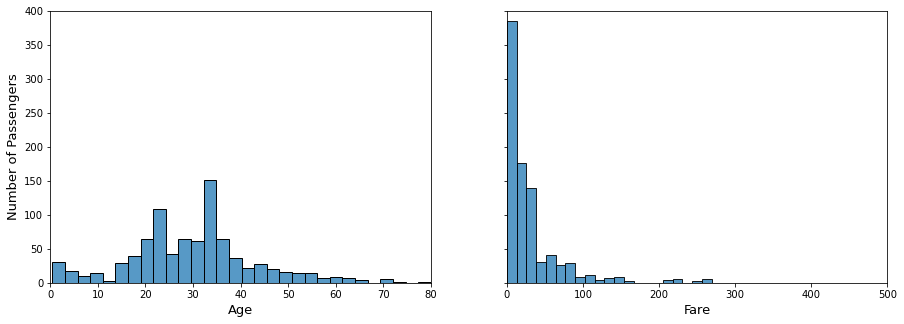

In [138]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5),sharey=True)

sns.histplot(df_train['Age'],bins=30,ax=ax1)
ax1.set_xlim([0,80])
ax1.set_ylim([0,400])
ax1.set_xlabel('Age',fontdict={'fontsize':13})
ax1.set_ylabel('Number of Passengers',fontdict={'fontsize':13})
#ax1.set_title('Countplot',fontdict={'fontsize':14})

sns.histplot(df_train['Fare'],ax=ax2,bins=40)
ax2.set_xlim([0,500])
ax2.set_xlabel('Fare',fontdict={'fontsize':13})

plt.show()

From the age distribution, we see the age concentrated around 30 years and a smaller distribution below 10 years indicating all the child population.
From the fare distribution, we see that most of the people paid less than 100 bucks.

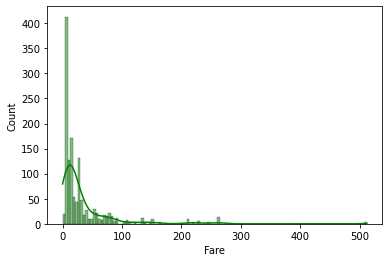

In [140]:
sns.histplot(data=all['Fare'], color='green', kde=True)
plt.show()

<AxesSubplot:>

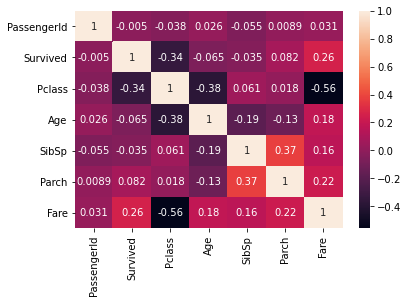

In [141]:
sns.heatmap(all.corr(),annot=True)

In [144]:
import plotly.express as px
fig = px.bar(all.groupby(['Pclass', 'Age', 'Embarked'],as_index=False).size(), x='Pclass', y="Age",
             facet_col="Embarked", barmode='relative')
fig.show()

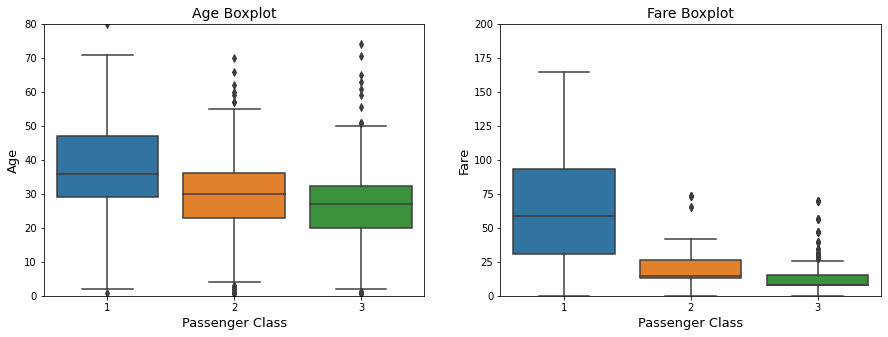

In [145]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5),sharex=True)

sns.boxplot(x='Pclass',y='Age',data=df_train,ax=ax1)
ax1.set_ylim([0,80])
ax1.set_xlabel('Passenger Class',fontdict={'fontsize':13})
ax1.set_ylabel('Age',fontdict={'fontsize':13})
ax1.set_title('Age Boxplot',fontdict={'fontsize':14})

sns.boxplot(x='Pclass',y='Fare',data=df_train,ax=ax2)
ax2.set_ylim([0,200])
ax2.set_xlabel('Passenger Class',fontdict={'fontsize':13})
ax2.set_ylabel('Fare',fontdict={'fontsize':13})
ax2.set_title('Fare Boxplot',fontdict={'fontsize':14})

plt.show()

From these boxplots, we can note the following observations:

Pclass 1 holds people with mean age around 40 years and has the highest mean fare.
Pclass 2 holds people with mean age around 25 years and has the lowest mean fare.
This data makes sense since it's likely to see older people to be wealthy and be capable to pay for a higher class while younger people have either no source of income or just started to earn and hence in the lower passenger class.

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

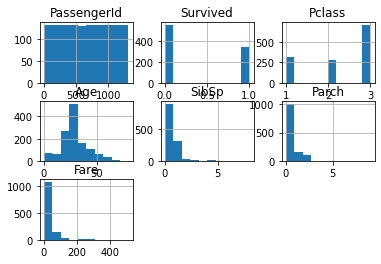

In [146]:

all.hist()

In [27]:
all['Embarked'] = all['Embarked'].fillna('S')
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


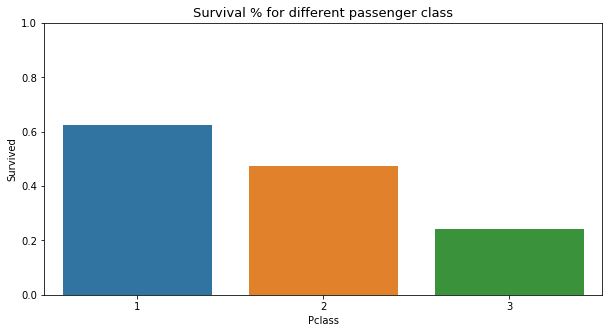

In [147]:
plt.figure(figsize=(10,5))
sns.barplot(x='Pclass',y='Survived',data=df_train,errwidth=0)
plt.ylim([0,1])
plt.title('Survival % for different passenger class',fontdict={'fontsize':13})

plt.show()

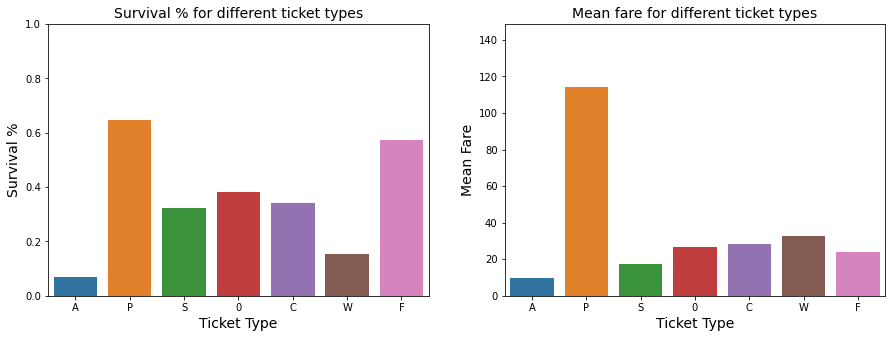

In [150]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.barplot(x='Ticket_type',y='Survived',data=df_train,errwidth=0,ax=ax1)
ax1.set_title('Survival % for different ticket types',fontdict={'fontsize':14})
ax1.set_ylim([0,1])
ax1.set_xlabel('Ticket Type',fontdict={'fontsize':14})
ax1.set_ylabel('Survival %',fontdict={'fontsize':14})


sns.barplot(x='Ticket_type',y='Fare',data=df_train,errwidth=0,ax=ax2)
ax2.set_title('Mean fare for different ticket types',fontdict={'fontsize':14})
#ax2.set_ylim([0,1])
ax2.set_xlabel('Ticket Type',fontdict={'fontsize':14})
ax2.set_ylabel('Mean Fare',fontdict={'fontsize':14})

plt.show()

As we can see here, the higher the passenger class the more likely are the chances of survival

Now we will see if we find any relationship between survival and the ticket type we just extracted from our data

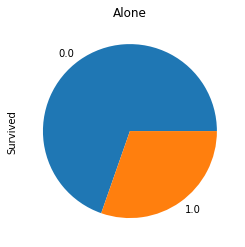

Text(0.5, 1.0, 'With Family')

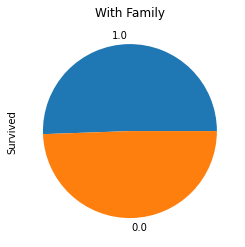

In [152]:
# Feature Engineering
all['IsAlone']=all['SibSp'] + all['Parch']
all['IsAlone']=all['IsAlone'].apply(lambda x: 0 if x >0 else 1)
all.groupby('IsAlone')['Survived'].value_counts()[1].plot(kind='pie')
plt.title('Alone')
plt.show()
all.groupby('IsAlone')['Survived'].value_counts()[0].plot(kind='pie')
plt.title('With Family')

Here on the left, we have a barplot showing us the mean survival rate of each ticket group. We can see that type P has the highest survival % while type A has the lowest.

On the right, we see that the ticket type P has the highest mean fare and the type A has the lowest mean fare. While this does not entirely explain the correlation between ticket type and survival, it does explain why the ticket type P and A have the survival rates we see since higher fare increases the chance of survival and vice versa. Other ticket types like for example 'F' have high chances of survival but the fare value does not explain it.

Thus, it is important for us to include all these features in our training model since any information not explained by one feature might be explained by some other feature.

We will end this EDA section with analysis of number of siblings/spouse and parents/children.

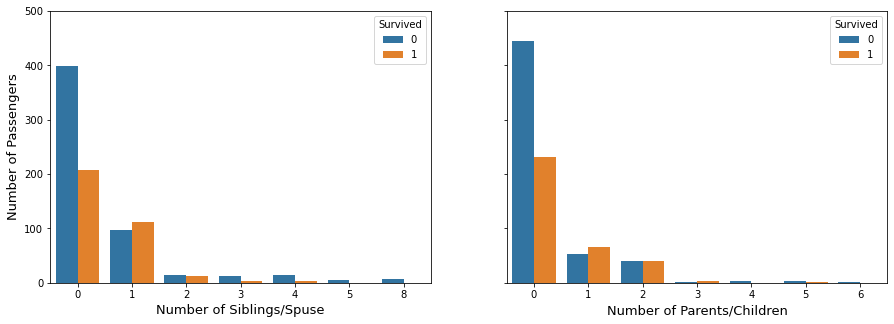

In [155]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5),sharey=True)

sns.countplot(x='SibSp',data=df_train,hue='Survived',ax=ax1)
ax1.set_ylim([0,500])
ax1.set_xlabel('Number of Siblings/Spuse',fontdict={'fontsize':13})
ax1.set_ylabel('Number of Passengers',fontdict={'fontsize':13})
ax1.legend(loc='upper right',title='Survived')

sns.countplot(x='Parch',data=df_train,hue='Survived',ax=ax2)
ax2.set_xlabel('Number of Parents/Children',fontdict={'fontsize':13})
ax2.set_ylabel('')
ax2.legend(loc='upper right',title='Survived')

plt.show()

As we can see here, people onboard the titanic with no family with them were less likely to survive as compared to people with family members present.

In [153]:
#Age
all.loc[ all['Age'] <= 16, 'Age'] = 0
all.loc[(all['Age'] > 16) & (all['Age'] <= 32), 'Age'] = 1
all.loc[(all['Age'] > 32) & (all['Age'] <= 48), 'Age'] = 2
all.loc[(all['Age'] > 48) & (all['Age'] <= 64), 'Age'] = 3
all.loc[ all['Age'] > 64, 'Age'] = 4

In [154]:
#Title
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)
    
    if title_search:
        return title_search.group(1)
    return ""

In [35]:
all['Title'] = all['Name'].apply(get_title)
all['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Title, dtype: int64

In [36]:
all['Title'] = all['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
all['Title'] = all['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
all['Title'] = all['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
all['Title'] = all['Title'].replace(['Mme.'], 'Mrs.')
all['Title'].value_counts()

Mr.         757
Miss.       264
Mrs.        198
Master.      61
Officer.     19
Royal.        6
Col.          4
Name: Title, dtype: int64

In [37]:
#Cabin
all['Cabin'] = all['Cabin'].fillna('Missing')
all['Cabin'] = all['Cabin'].str[0]
all['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [38]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  IsAlone      1309 non-null   int64  
 13  Title        1309 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


In [39]:
#Family Size & Alone 
all['Family_Size'] = all['SibSp'] + all['Parch'] + 1
all['IsAlone'] = 0
all.loc[all['Family_Size']==1, 'IsAlone'] = 1
all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone,Title,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,0.0,1,0,A/5 21171,7.2500,M,S,0,Mr.,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.0,1,0,PC 17599,71.2833,C,C,0,Mrs.,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0.0,0,0,STON/O2. 3101282,7.9250,M,S,1,Miss.,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.0,1,0,113803,53.1000,C,S,0,Mrs.,2
4,5,0.0,3,"Allen, Mr. William Henry",male,0.0,0,0,373450,8.0500,M,S,1,Mr.,1


In [40]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  IsAlone      1309 non-null   int64  
 13  Title        1309 non-null   object 
 14  Family_Size  1309 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 163.6+ KB


In [41]:
#Drop unwanted variables
all_1 = all.drop(['Name', 'Ticket'], axis = 1)
all_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,IsAlone,Title,Family_Size
0,1,0.0,3,male,0.0,1,0,7.2500,M,S,0,Mr.,2
1,2,1.0,1,female,0.0,1,0,71.2833,C,C,0,Mrs.,2
2,3,1.0,3,female,0.0,0,0,7.9250,M,S,1,Miss.,1
3,4,1.0,1,female,0.0,1,0,53.1000,C,S,0,Mrs.,2
4,5,0.0,3,male,0.0,0,0,8.0500,M,S,1,Mr.,1


In [42]:
all_dummies = pd.get_dummies(all_1)
all_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   int64  
 3   Age             1309 non-null   float64
 4   SibSp           1309 non-null   int64  
 5   Parch           1309 non-null   int64  
 6   Fare            1309 non-null   float64
 7   IsAlone         1309 non-null   int64  
 8   Family_Size     1309 non-null   int64  
 9   Sex_female      1309 non-null   uint8  
 10  Sex_male        1309 non-null   uint8  
 11  Cabin_A         1309 non-null   uint8  
 12  Cabin_B         1309 non-null   uint8  
 13  Cabin_C         1309 non-null   uint8  
 14  Cabin_D         1309 non-null   uint8  
 15  Cabin_E         1309 non-null   uint8  
 16  Cabin_F         1309 non-null   uint8  
 17  Cabin_G         1309 non-null   ui

In [43]:
all_train = all_dummies[all_dummies['Survived'].notna()]
all_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    float64
 2   Pclass          891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   IsAlone         891 non-null    int64  
 8   Family_Size     891 non-null    int64  
 9   Sex_female      891 non-null    uint8  
 10  Sex_male        891 non-null    uint8  
 11  Cabin_A         891 non-null    uint8  
 12  Cabin_B         891 non-null    uint8  
 13  Cabin_C         891 non-null    uint8  
 14  Cabin_D         891 non-null    uint8  
 15  Cabin_E         891 non-null    uint8  
 16  Cabin_F         891 non-null    uint8  
 17  Cabin_G         891 non-null    uin

In [44]:
all_test = all_dummies[all_dummies['Survived'].isna()]
all_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Survived        0 non-null      float64
 2   Pclass          418 non-null    int64  
 3   Age             418 non-null    float64
 4   SibSp           418 non-null    int64  
 5   Parch           418 non-null    int64  
 6   Fare            418 non-null    float64
 7   IsAlone         418 non-null    int64  
 8   Family_Size     418 non-null    int64  
 9   Sex_female      418 non-null    uint8  
 10  Sex_male        418 non-null    uint8  
 11  Cabin_A         418 non-null    uint8  
 12  Cabin_B         418 non-null    uint8  
 13  Cabin_C         418 non-null    uint8  
 14  Cabin_D         418 non-null    uint8  
 15  Cabin_E         418 non-null    uint8  
 16  Cabin_F         418 non-null    uint8  
 17  Cabin_G         418 non-null    uin

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_train.drop(['PassengerId','Survived'],axis=1), 
                                                    all_train['Survived'], test_size=0.30, 
                                                    random_state=101)

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
RF_Model = RandomForestClassifier()
#from sklearn.model_selection import GridSearchCV
#Using max_depth, criterion will suffice for DT Models, rest all will remain constant 
#parameters = {'n_estimators' : (10,30,50,70,90,100)
#              , 'criterion' : ('gini', 'entropy')
#              , 'max_depth' : (3,5,7,9,10)
#              , 'max_features' : ('auto', 'sqrt')
#              , 'min_samples_split' : (2,4,6)
#              #, 'min_weight_fraction_leaf' : (0.0,0.1,0.2,0.3)
#             }



In [49]:
RF_Model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [50]:
RF_Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='sqrt', min_samples_split=6,
                       n_estimators=10, n_jobs=-1)

In [51]:
predictions = RF_Model.predict(X_test)
predictions

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0.

In [52]:
print(f'Test : {RF_Model.score(X_test, y_test):.3f}')
print(f'Train : {RF_Model.score(X_train, y_train):.3f}')

Test : 0.817
Train : 0.876


In [53]:
all_test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsAlone,Family_Size,Sex_female,...,Embarked_C,Embarked_Q,Embarked_S,Title_Col.,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer.,Title_Royal.
0,892,NaN,3,0.0,0,0,7.8292,1,1,0,...,0,1,0,0,0,0,1,0,0,0
1,893,NaN,3,0.0,1,0,7.0000,0,2,1,...,0,0,1,0,0,0,0,1,0,0
2,894,NaN,2,0.0,0,0,9.6875,1,1,0,...,0,1,0,0,0,0,1,0,0,0
3,895,NaN,3,0.0,0,0,8.6625,1,1,0,...,0,0,1,0,0,0,1,0,0,0
4,896,NaN,3,0.0,1,1,12.2875,0,3,1,...,0,0,1,0,0,0,0,1,0,0


In [54]:
TestForPred = all_test.drop(['PassengerId', 'Survived'], axis = 1)

In [55]:
t_pred = RF_Model.predict(TestForPred).astype(int)

In [56]:
PassengerId = all_test['PassengerId']

In [57]:
RF_Sub = pd.DataFrame({'PassengerId': PassengerId, 'Survived':t_pred })
RF_Sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
